## Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import cv2
import tensorflow as tf

## Get the data

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
#Loading the data into train-test
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [5]:
X_train.shape , Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap = plt.cm.binary)
    plt.title(Y_train[i])
    plt.show()

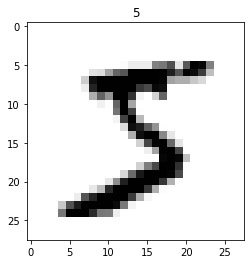

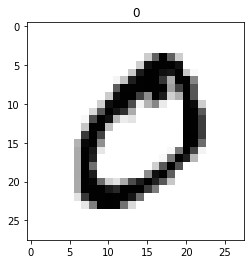

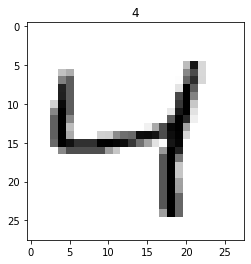

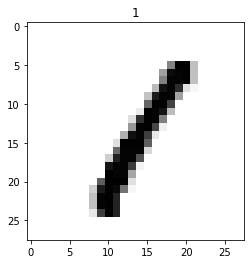

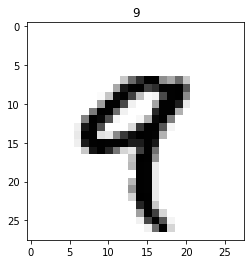

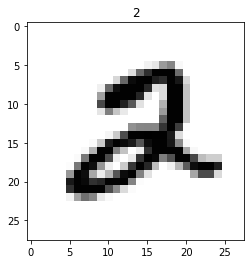

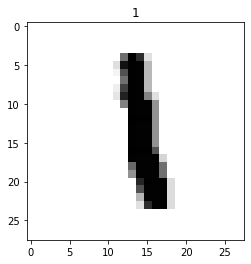

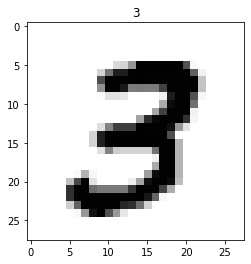

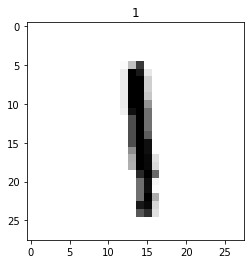

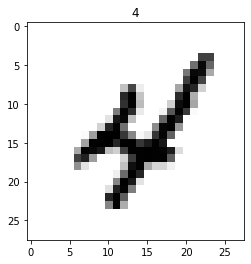

In [7]:
#DataSet Image View
for i in range(10):
    plot_input_img(i)

## Preprocessing Images

In [8]:
#normalizing the image
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
x_trainr=np.array(X_train).reshape(-1,28,28,1)
x_testr=np.array(X_test).reshape(-1,28,28,1)

In [11]:
x_trainr.shape,x_testr.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Building the models

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [13]:
model = Sequential()

## Adding the layers

In [14]:
model.add(Conv2D(64,(3,3),input_shape =x_trainr.shape[1:],activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

## Compiling the model

In [16]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

## Callbacks

## Train Model

In [17]:
model.fit(x_trainr,Y_train,epochs= 10,validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.3155 - accuracy: 0.9035 - val_loss: 0.1879 - val_accuracy: 0.9384
Epoch 2/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.0813 - val_accuracy: 0.9752
Epoch 3/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0901 - val_accuracy: 0.9743
Epoch 4/10
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0804 - val_accuracy: 0.9778
Epoch 5/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0649 - val_accuracy: 0.9807
Epoch 6/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0672 - val_accuracy: 0.9809
Epoch 7/10
1313/1313 [==============================] - 61s 47ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0636 -

In [18]:
test_loss,test_acc=model.evaluate(x_testr,Y_test)
print(test_loss,test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0517 - accuracy: 0.9857
0.05165212228894234 0.9857000112533569


## Saving the model

In [25]:
model.save('digitRecognitionModel.h5')

In [4]:
model=tf.keras.models.load_model('digitRecognitionModel.h5')

## Predicition on an Image

(421, 262, 3)

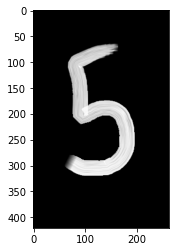

In [5]:
img=cv2.imread('Images/7.png')
plt.imshow(img)
img.shape

In [6]:
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(grey,(28,28),interpolation=cv2.INTER_AREA)
newimg=tf.keras.utils.normalize(resized,axis=1)
newimg=np.array(newimg).reshape(-1,28,28,1)
pred=model.predict(newimg)
print(np.argmax(pred))

1/1 [==============================] - 0s 211ms/step
5


## Building an Air Canvas for prediction

In [7]:
import cv2
import numpy as np
import mediapipe as mp
from collections import deque
from PIL import ImageGrab
import tensorflow as tf
import winGuiAuto
import win32gui
import win32api
import win32con

In [9]:
# Giving different arrays to handle colour points of different colour
bpoints = [deque(maxlen=1024)]
gpoints = [deque(maxlen=1024)]
rpoints = [deque(maxlen=1024)]
ypoints = [deque(maxlen=1024)]

font=cv2.FONT_HERSHEY_PLAIN
font_scale=1.5
# These indexes will be used to mark the points in particular arrays of specific colour
blue_index = 0
green_index = 0
red_index = 0
yellow_index = 0

#The kernel to be used for dilation purpose 
kernel = np.ones((5,5),np.uint8)

colors = [(255, 255, 255), (0, 255, 0), (0, 0, 255), (0, 255, 255)]
colorIndex = 0

# Here is code for Canvas setup
paintWindow = np.zeros((421,262,3))
paintWindow = cv2.rectangle(paintWindow, (40,1), (140,65), (255,255,255), 2)
paintWindow = cv2.rectangle(paintWindow, (160,1), (255,65), (255,255,255), 2)
paintWindow = cv2.rectangle(paintWindow, (275,1), (370,65), (0,255,0), 2)
paintWindow = cv2.rectangle(paintWindow, (390,1), (485,65), (0,0,255), 2)
paintWindow = cv2.rectangle(paintWindow, (505,1), (600,65), (0,255,255), 2)

cv2.putText(paintWindow, "CLEAR", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "WHITE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5,  (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5,  (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5,  (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5,  (255, 255, 255), 2, cv2.LINE_AA)
cv2.namedWindow('Paint', cv2.WINDOW_AUTOSIZE)


# initialize mediapipe fo 
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils


# Initialize the webcam
cap = cv2.VideoCapture(0)
ret = True

text="Some Text in a Box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=paintWindow.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x +text_width+2,text_offset_y-text_height-2))



cntr=0
while ret:
    # Reading each frame from the webcam
    ret, frame = cap.read()
    cntr=cntr+1
    if cntr%4==0:
        hwnd=winGuiAuto.findTopWindow("Paint")
        win32gui.SetWindowPos(hwnd,win32con.HWND_TOPMOST,0,0,0,0,win32con.SWP_NOMOVE|win32con.SWP_NOSIZE)
        rect=win32gui.GetWindowPlacement(hwnd)[-1]
        image=ImageGrab.grab(rect)
        img_np=np.array(image)

        grey=cv2.cvtColor(img_np,cv2.COLOR_BGR2GRAY)
        grey=grey[100:421,20:262]
        resized=cv2.resize(grey,(28,28),interpolation=cv2.INTER_AREA)
        newimg=tf.keras.utils.normalize(resized,axis=1)
        newimg=np.array(newimg).reshape(-1,28,28,1)
        pred=model.predict(newimg)
        status=np.argmax(pred)
        
        cv2.rectangle(paintWindow,(0,380),(30,410),(0,0,0),-1)
        cv2.putText(paintWindow,status.astype(str),(10,400),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.imshow("Paint", paintWindow)
        
        
        
    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    frame = cv2.rectangle(frame, (40,1), (140,65), (0,0,0), 2)
    frame = cv2.rectangle(frame, (160,1), (255,65), (255,0,0), 2)
    frame = cv2.rectangle(frame, (275,1), (370,65), (0,255,0), 2)
    frame = cv2.rectangle(frame, (390,1), (485,65), (0,0,255), 2)
    frame = cv2.rectangle(frame, (505,1), (600,65), (0,255,255), 2)
    frame = cv2.rectangle(frame, (20,100), (250,400), (0,255,255), 2)
    cv2.putText(frame, "DRAW HERE", (80, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "CLEAR", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "WHITE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255, 255), 2, cv2.LINE_AA)
    #frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # # print(id, lm)
                # print(lm.x)
                # print(lm.y)
                lmx = int(lm.x * 640)
                lmy = int(lm.y * 480)

                landmarks.append([lmx, lmy])


            # Drawing landmarks on frames
#             mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
        fore_finger = (landmarks[8][0],landmarks[8][1])
        center = fore_finger
        thumb = (landmarks[4][0],landmarks[4][1])
        cv2.circle(frame, center, 3, (0,255,0),-1)
        print(center[1]-thumb[1])
        if (thumb[1]-center[1]<30):
            bpoints.append(deque(maxlen=512))
            blue_index += 1
            gpoints.append(deque(maxlen=512))
            green_index += 1
            rpoints.append(deque(maxlen=512))
            red_index += 1
            ypoints.append(deque(maxlen=512))
            yellow_index += 1

        elif center[1] <= 65:
            if 40 <= center[0] <= 140: # Clear Button
                bpoints = [deque(maxlen=512)]
                gpoints = [deque(maxlen=512)]
                rpoints = [deque(maxlen=512)]
                ypoints = [deque(maxlen=512)]

                blue_index = 0
                green_index = 0
                red_index = 0
                yellow_index = 0

                paintWindow[67:,:,:] = 0
            elif 160 <= center[0] <= 255:
                    colorIndex = 0 # Blue
            elif 275 <= center[0] <= 370:
                    colorIndex = 1 # Green
            elif 390 <= center[0] <= 485:
                    colorIndex = 2 # Red
            elif 505 <= center[0] <= 600:
                    colorIndex = 3 # Yellow
        else :
            if colorIndex == 0:
                bpoints[blue_index].appendleft(center)
            elif colorIndex == 1:
                gpoints[green_index].appendleft(center)
            elif colorIndex == 2:
                rpoints[red_index].appendleft(center)
            elif colorIndex == 3:
                ypoints[yellow_index].appendleft(center)
    # Append the next deques when nothing is detected to avoid messing up
    else:
        bpoints.append(deque(maxlen=512))
        blue_index += 1
        gpoints.append(deque(maxlen=512))
        green_index += 1
        rpoints.append(deque(maxlen=512))
        red_index += 1
        ypoints.append(deque(maxlen=512))
        yellow_index += 1

    # Draw lines of all the colors on the canvas and frame
    points = [bpoints, gpoints, rpoints, ypoints]
    
    for i in range(len(points)):
        for j in range(len(points[i])):
            for k in range(1, len(points[i][j])):
                if points[i][j][k - 1] is None or points[i][j][k] is None:
                    continue
                cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 30)
                cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 30)
    
    
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step
-13
-15
-14
1/1 [==============================] - 0s 30ms/step
-8
-33
-31
-45
1/1 [==============================] - 0s 32ms/step
-45
-42
-51
-51
1/1 [==============================] - 0s 33ms/step
-52
-63
-61
-58
1/1 [==============================] - 0s 34ms/step
-52
-55
-51
-60
1/1 [==============================] - 0s 33ms/step
-57
-58
-58
-58
1/1 [==============================] - 0s 41ms/step
-58
-62
-61
-61
1/1 [==============================] - 0s 42ms/step
-58
-52
-51
-50
1/1 [==============================] - 0s 50ms/step
-48
-68
-63
-65
1/1 [==============================] - 0s 43ms/step
-64
-41
-41
-50
1/1 [==============================] - 0s 40ms/step
-70
-69
-64
-67
1/1 [==============================] - 0s 49ms/step
-63
-63
-67
-65
1/1 [==============================] - 0s 31ms/step
-65
-61
-61
-59
1/1 [==============================] - 0s 29ms/step
-62
-62
-59
-54
1/1 [==============================] - 0s 32ms/step
-

1/1 [==============================] - 0s 48ms/step
-15
-12
-14
-24
1/1 [==============================] - 0s 35ms/step
5
-22
-28
-24
1/1 [==============================] - 0s 34ms/step
-20
-15
-14
-18
1/1 [==============================] - 0s 36ms/step
18
20
-5
-13
1/1 [==============================] - 0s 47ms/step
-14
-7
-12
-11
1/1 [==============================] - 0s 71ms/step
-10
-21
-23
-22
1/1 [==============================] - 0s 39ms/step
-25
-45
-48
-47
1/1 [==============================] - 0s 45ms/step
-45
-46
-49
-49
1/1 [==============================] - 0s 59ms/step
-48
-2
-4
7
1/1 [==============================] - 0s 34ms/step
62
-9
-12
28
1/1 [==============================] - 0s 53ms/step
22
3
-16
-19
1/1 [==============================] - 0s 44ms/step
-19
-12
-14
-18
1/1 [==============================] - 0s 35ms/step
-17
-14
-13
-12
1/1 [==============================] - 0s 45ms/step
-18
-22
-21
-17
1/1 [==============================] - 0s 41ms/step
-18
-22
-23


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 22ms/step
